# SM2001 Project # 5

In [1]:
import scipy.io as sio
import numpy as np 
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
def U2X(Index):
    U2X_ALL = np.zeros((Index,21,21))
    U_all = np.zeros((Index,4000,21,21))
    for ind in range(Index): 
        for i in range(TIME):
            a_ = DATA[ind,i,:]
            a_ = np.expand_dims(a_,axis=-1)
            U_all[ind,i,:,:] = Velocity_Mean_Profile(a_)
        u_mean_t = np.mean(U_all,axis=1)
        u_mean_t_expand = np.expand_dims(u_mean_t,axis=1)
        u_prime_all = np.zeros(shape = U_all.shape)


    for ind in range(Index):
        for i in range(TIME):
            u_prime_all[ind,i,:,:] = U_all[ind,i,:,:] - u_mean_t_expand
        u2x_all = u_prime_all * u_prime_all
        u2x_mean = np.mean(u2x_all,axis=1)
        U2X_ALL[ind,:,:] = u2x_mean
    return U2X_ALL

# Load the data from matlab

In [3]:
FILE =sio.loadmat("/Users/wangyuning/Desktop/Data-driven Methods in Engineering Mechanics/SM2001_Project/Data generator (Moehlis model)/moehlis_data_1000.mat")
DATA  = FILE["data"]
print(FILE.keys())
print(f"The shape of whole dataset is {DATA.shape}")

dict_keys(['__header__', '__version__', '__globals__', 'data'])
The shape of whole dataset is (1000, 4000, 9)


# Global Variables

In [4]:
#Number of Timeseries
SERIES_NUM = DATA.shape[0]
# Timesteps
TIME = DATA.shape[1]
# ODE
ODE = DATA.shape[2]

# Task 1 Check and Discard any timeseries which has laminarlization

+ Criteria : The amplitude ${a_1}$ is 1 and rest ${a_{2}}$ ~ ${a_{9}}$ nearly 0
+ i.e |${a_1}$| -1 <=0.01

In [5]:
discard_indx = []
for timeseries in np.arange(SERIES_NUM) :
        series = DATA[timeseries,:,:]
        a1 = series[:,0]
        a2a9 = series[:,1:]
        # print(f"The $a_1$ is {a1} ") 
        threshold = 0.01

        crit = np.abs(a1-1) 
        if crit.any() <= threshold and a2a9.mean() <= threshold:
            discard_indx.append(timeseries)

In [6]:
discard_indx = np.array(discard_indx) 
if discard_indx.shape[0] != 0:
    print(f"The timeseries should be discard is {discard_indx}")
else:
    print("All the timeseries are not going to relaminarlize !")

All the timeseries are not going to relaminarlize !


# Task 2 Temporal Evolution

## 2.1 Plot Several Timeseries

In [7]:
## Randomly choose 3 timeseries from 1000 timeseries 
rand_series_index = np.random.randint(0,1000,size=(3))
print(f"In this time, Timeseries number {rand_series_index} are going to be plotted ")

In this time, Timeseries number [267 968 737] are going to be plotted 


In [8]:
def Plot_Timeseries(timeseries):
        fontdict_title = {"fontweight":"bold","fontsize":25}
        fontdict = {"fontsize":15}

        f,axes = plt.subplots(5,2,figsize = (8,10))

        f.delaxes(axes[-1,-1])
        ode_range = np.arange(ODE)
        
        axs = axes.flatten()
        for ax,ode in zip(axs,ode_range):
                
                ax.plot(timeseries[:,ode])
                ax.set_xlabel("Time",fontdict)
                ax.set_ylabel("Amplitude",fontdict)
                ax.set_title("$a_{}$".format(ode+1),fontdict=fontdict_title)
                ax.tick_params(axis='both', which='major', labelsize=5)
                
        plt.subplots_adjust(left=0.08,hspace= 0.8,wspace=0.2 )
        

In [9]:
# for ts in rand_series_index:
    # Plot_Timeseries(DATA[ts,:,:])
    # plt.savefig(r"/Users/wangyuning/Desktop/Data-driven Methods in Engineering Mechanics/SM2001_Project/Task2/Timeseries{}".format(ts))
    

## 2.2 Velocity Componments visualization

In [10]:
import Velocity_Reconst
import visualize_f
a_ = DATA[5,:,:]
# visualize_f.visualize_fields(a_,410,420)


# Task 3 Turbulence Statics 

In [11]:
def Velocity_Mean_Profile(a_):
    # for t in np.arange(start_t,end_t):
        import Velocity_Reconst as v 
        a = a_

        # velocity compoments
        ux = a[0]*v.u1x + a[1]*v.u2x + a[5]*v.u6x + a[6]*v.u7x + a[7]*v.u8x + a[8]*v.u9x
        uy = a[2]*v.u3y + a[7]*v.u8y
        uz = a[2]*v.u3z + a[3]*v.u4z + a[4]*v.u5z + a[5]*v.u6z + a[6]*v.u7z + a[7]*v.u8z
       

        # Average velocity in x-direction (down stream)
        ux_avg = np.reshape(np.mean(ux,axis=0),(v.ny,v.nz))
        uy_avg = np.reshape(np.mean(uy,axis=0),(v.ny,v.nz))
        uz_avg = np.reshape(np.mean(uz,axis=0),(v.ny,v.nz))
       
        # velocities at mid plane
        ce = np.ceil(v.ny//2)
        ce = np.int64(ce)
   
        ux_mid = np.reshape( ux[:,ce,:],(v.nx,v.nz) )
        uy_mid = np.reshape( uy[:,ce,:],(v.nx,v.nz) )
        uz_mid = np.reshape( uz[:,ce,:],(v.nx,v.nz) )
        return ux_avg        # return ux_avg,uy_avg,uz_avg,ux,uy,uz

In [12]:
def Velocity_x(a_):
    # for t in np.arange(start_t,end_t):
        import Velocity_Reconst as v 
        a = a_
        # velocity compomenets
        ux = a[0]*v.u1x + a[1]*v.u2x + a[5]*v.u6x + a[6]*v.u7x + a[7]*v.u8x + a[8]*v.u9x
        return ux 
def Velocity_y(a_):
    import Velocity_Reconst as v 
    a = a_
        # velocity compomenets
    uy = a[2]*v.u3y + a[7]*v.u8y
    return uy
def Velocity_z(a_):
    import Velocity_Reconst as v 
    a = a_
        # velocity compomenets
    uz = a[2]*v.u3z + a[3]*v.u4z + a[4]*v.u5z + a[5]*v.u6z + a[6]*v.u7z + a[7]*v.u8z
    return uz

Take the first time series as example

In [13]:
print(f"The shape of 200 dataset is {DATA[200,:,:].shape}")
#Averaging mode in time, 
# which gives the corresponding velocity are averaged in time as well
DATA_avg = np.mean(DATA[:200,:,:],axis=1)
print(f"After averaging in time the data has shape of {DATA_avg.shape}")


The shape of 200 dataset is (4000, 9)
After averaging in time the data has shape of (200, 9)


In [14]:
data_sample = DATA[0,:,:]

a_  = data_sample[0,:]
a_ = np.expand_dims(a_,-1)
ux = Velocity_Mean_Profile(a_)
ux.shape

(21, 21)

## 3.1 Mean Profile

(200, 9)


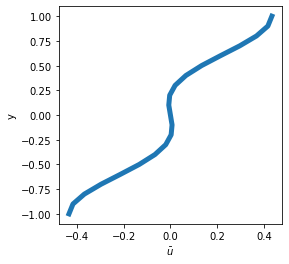

In [57]:
import Velocity_Reconst as v
INDX = 200
Data200 = DATA[:INDX,:,:]
Data200_time_avg = np.mean(Data200,axis=1)
print(Data200_time_avg.shape)


# Time averaged ux_avg 
Data200_series_all = np.zeros((INDX,21,21))


for ind in range(INDX):
    a_ = Data200_time_avg[ind,:]
    Data200_series_all[ind,:,:] = Velocity_Mean_Profile(a_)
plt.figure(figsize=(4,4))
plt.plot(np.mean(Data200_series_all,axis=(0,2)),v.yp,lw=5)
plt.xlabel(r"$\bar{u}$")
plt.ylabel("y")
plt.show()

## 3.2 Fluctuations

In [64]:
a_ = DATA[1,:,:]
print(a_.shape)

a_avg_time = np.mean(a_,axis=0)
print(a_avg_time.shape)
U_mean_time = Velocity_x(a_avg_time)
print(U_mean_time.shape)
U_all = np.zeros((TIME,21,21,21))
for t in range(TIME):
    a1 = a_[t,:]
    U_all[t,:,:,:] = Velocity_x(a1) - U_mean_time
print(U_all.shape)

(4000, 9)
(9,)
(21, 21, 21)
(4000, 21, 21, 21)


In [80]:
def Single_u2x(a_):
    a_avg_time = np.mean(a_,axis=0)
    U_mean_time = Velocity_x(a_avg_time)
    U_all = np.zeros((TIME,21,21,21))
    for t in range(TIME):
        a1 = a_[t,:]
        U_all[t,:,:,:] = Velocity_x(a1) - U_mean_time
    u2x= U_all * U_all
    u2x_mean = np.mean(u2x,axis=(0,1,3))
    return u2x_mean


In [81]:
u2x_all = np.zeros((INDX,21))
for ind in range(INDX):
    a_ = DATA[ind,:,:]
    u2x_mean = Single_u2x(a_)
    u2x_all[ind,:] = u2x_mean

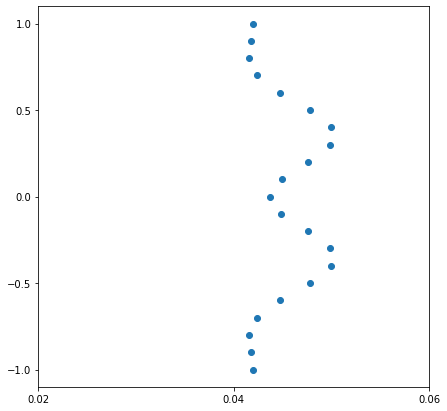

In [82]:
# u2x= U_all * U_all
# u2x_mean = np.mean(u2x,axis=(0,2,3))
plt.figure(figsize=(7,7))
plt.plot(np.mean(u2x_all,0),v.yp,"o")
plt.xticks([0.02,0.04,0.06])
plt.yticks([-1,-0.5,0,0.5,1])
plt.show()

## 3.3 Reynolds Stress

In [83]:
def Single_uv(a_):
    a_avg_time = np.mean(a_,axis=0)
    U_mean_time = Velocity_x(a_avg_time)
    V_mean_time = Velocity_y(a_avg_time)
    U_all = np.zeros((TIME,21,21,21))
    V_all = np.zeros((TIME,21,21,21))
    for t in range(TIME):
        a1 = a_[t,:]
        U_all[t,:,:,:] = Velocity_x(a1) - U_mean_time
        V_all[t,:,:,:] = Velocity_y(a1) - V_mean_time
    u2x= U_all * V_all
    u2x_mean = np.mean(u2x,axis=(0,1,3))
    return u2x_mean


In [84]:
uv_all = np.zeros((INDX,21))
for ind in range(INDX):
    a_ = DATA[ind,:,:]
    uv_mean = Single_uv(a_)
    uv_all[ind,:] = uv_mean

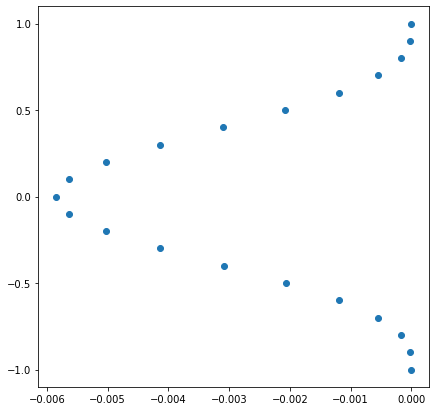

In [86]:
plt.figure(figsize=(7,7))
plt.plot(np.mean(uv_all,0),v.yp,"o")
# plt.xticks([0.02,0.04,0.06])
plt.yticks([-1,-0.5,0,0.5,1])
plt.show()